# Wine Quality Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\eashw\\Untitled Folder 1\\WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Exploratory Data Analysis

In [3]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
data.quality.value_counts().head()

5    483
6    462
7    143
4     33
8     16
Name: quality, dtype: int64

Visualization

<AxesSubplot:>

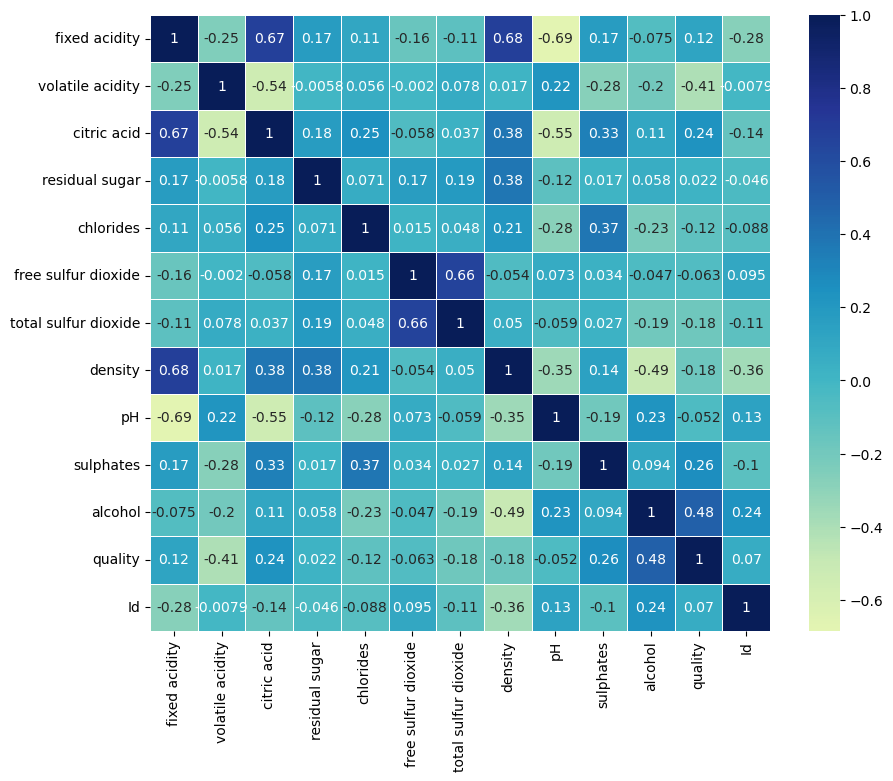

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,lw=.5,center=0,cmap="YlGnBu")

<AxesSubplot:title={'center':'Quality of Wine'}>

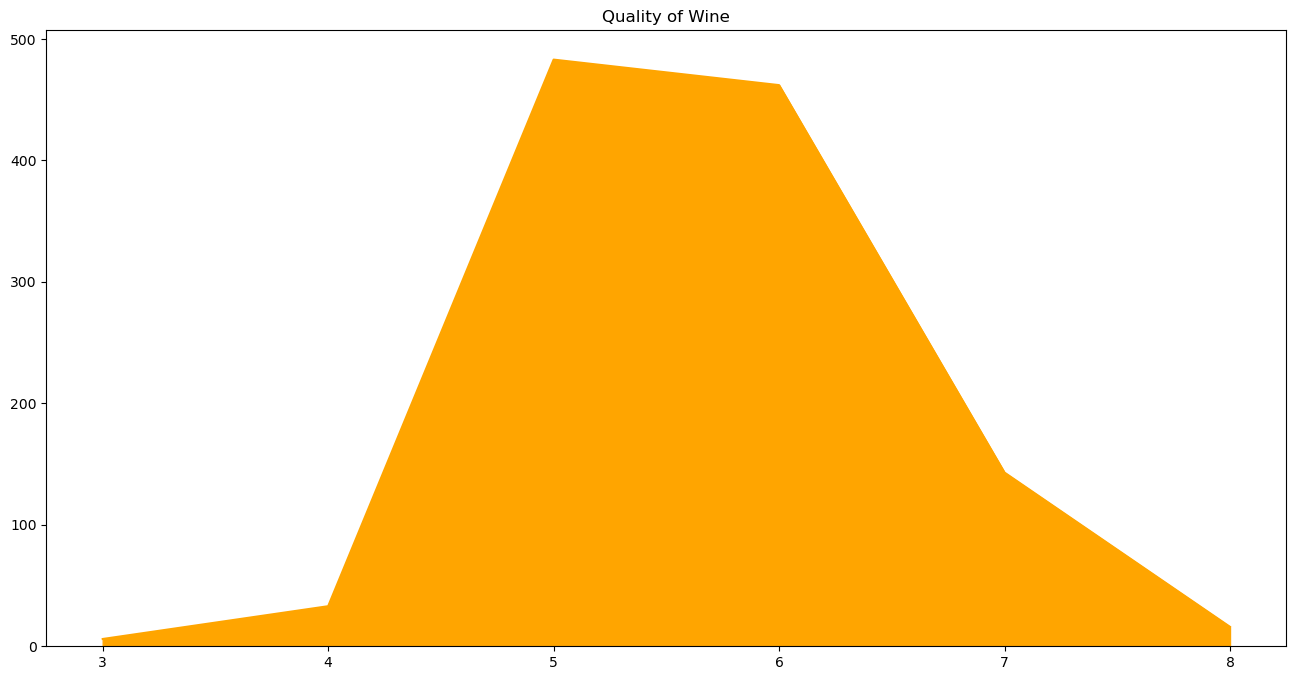

In [10]:
data['quality'].value_counts().sort_index().plot.area(figsize=(16,8),title='Quality of Wine',color='orange')

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

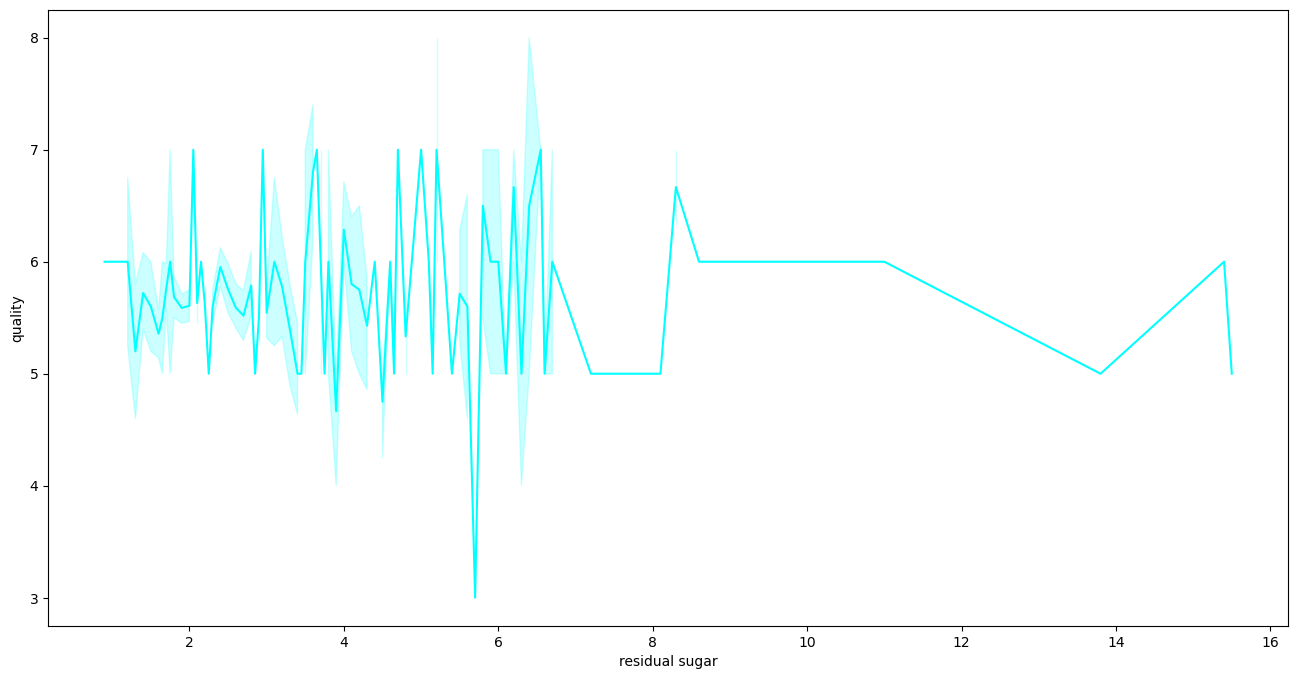

In [11]:
plt.figure(figsize=(16,8))
sns.lineplot(x='residual sugar',y='quality',data=data,color='cyan')

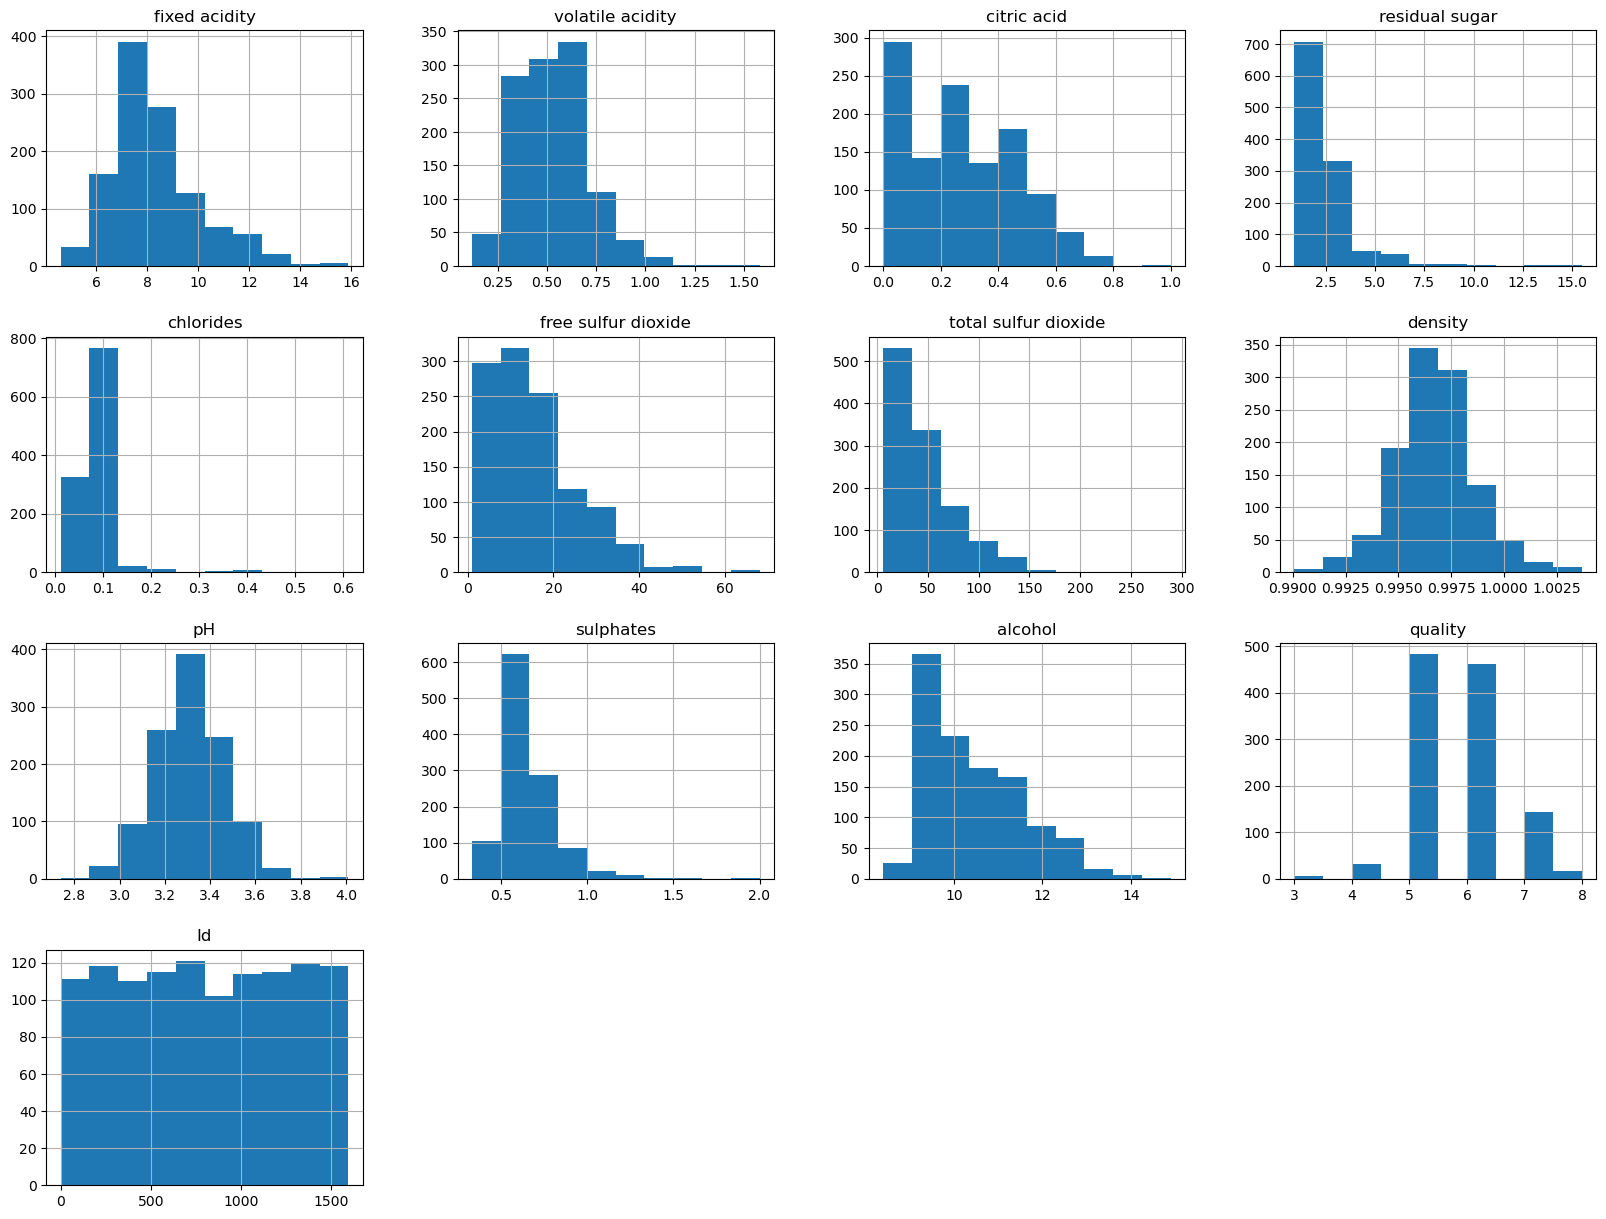

In [12]:
data.hist(figsize=(20,15))
plt.show()

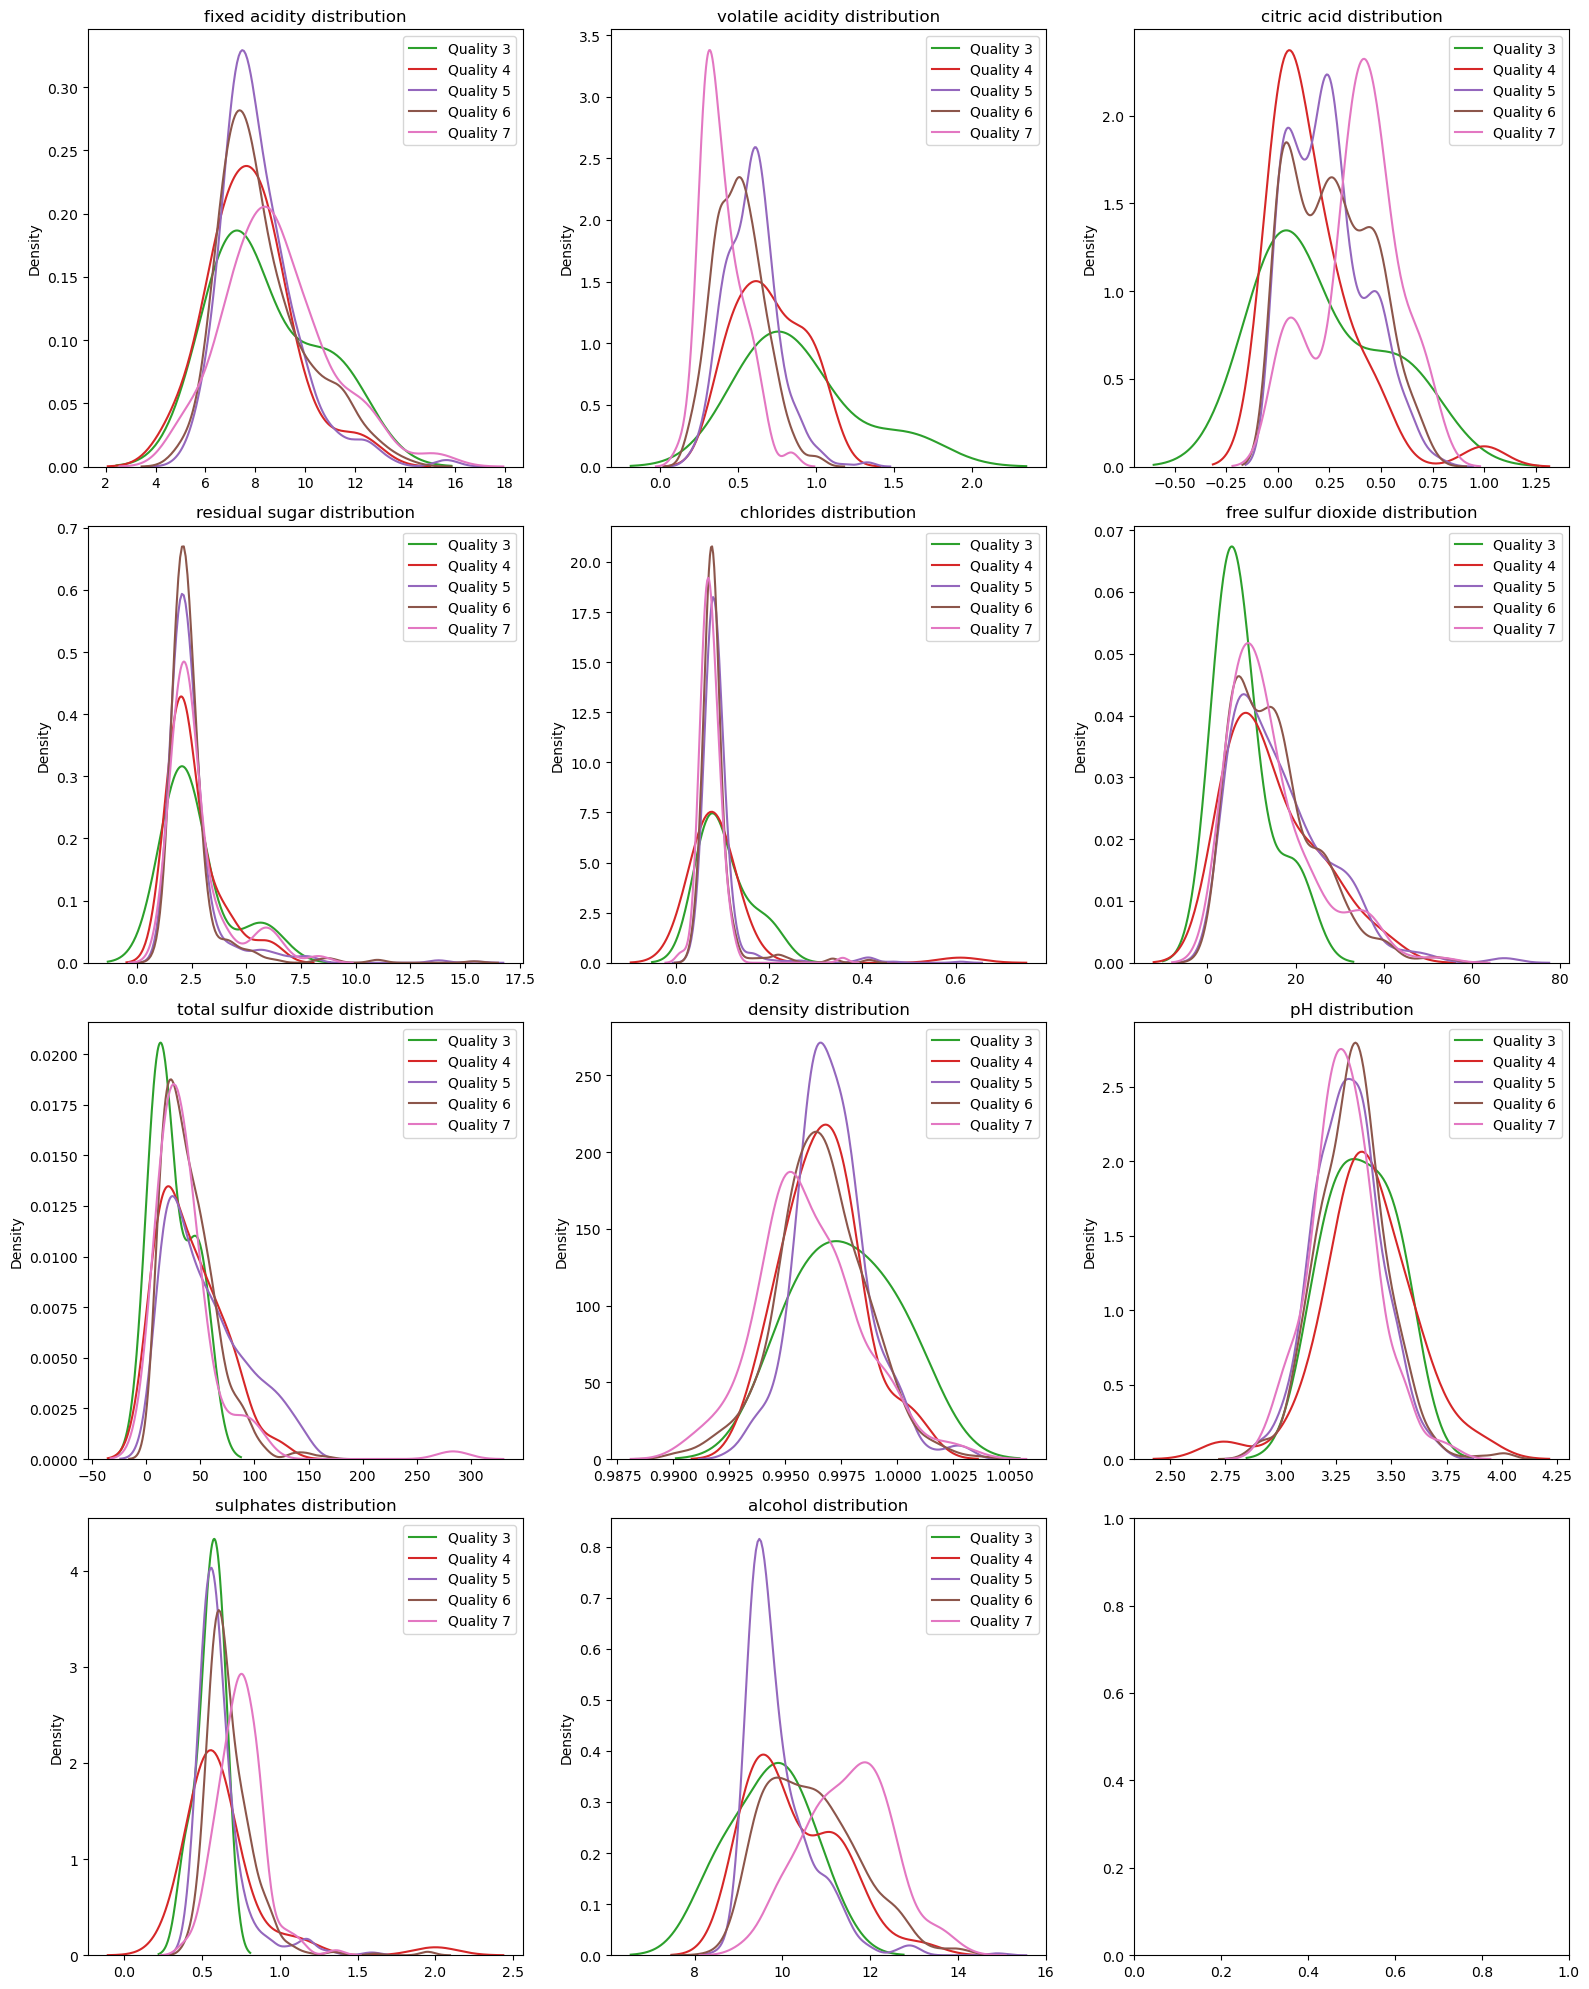

In [13]:
cols_to_draw = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']
cols = 3
rows = int(np.ceil(len(cols_to_draw) / cols))
fig, ax = plt.subplots(rows, cols, figsize=(16, rows * 5))
ax = ax.flatten()

quality_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

for x, col in enumerate(cols_to_draw):
    for quality in range(1, 8):
        sns.kdeplot(data=data[data['quality'] == quality][col], ax=ax[x], color=quality_colors[quality - 1],
                    common_norm=False, label=f'Quality {quality}')
    ax[x].set_title(f'{col} distribution')
    ax[x].set_xlabel(None)
    ax[x].legend()

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

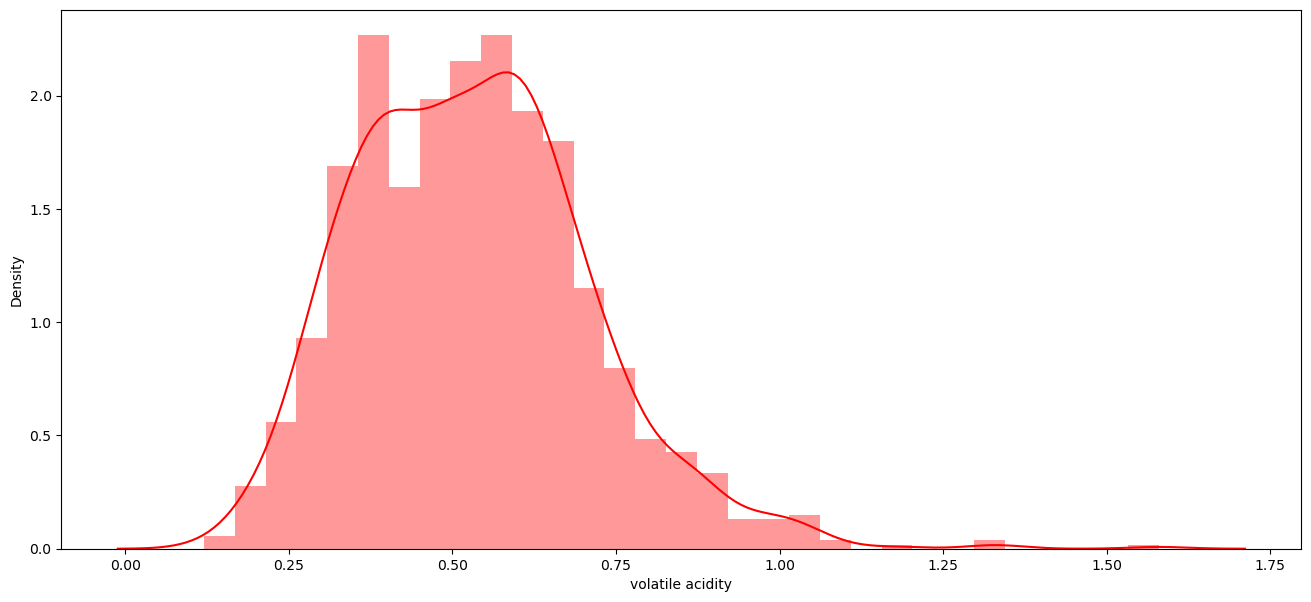

In [14]:
plt.figure(figsize=(16,7))
sns.distplot(data['volatile acidity'],color='red')

Feature Importance

Text(0.5, 0, 'Value')

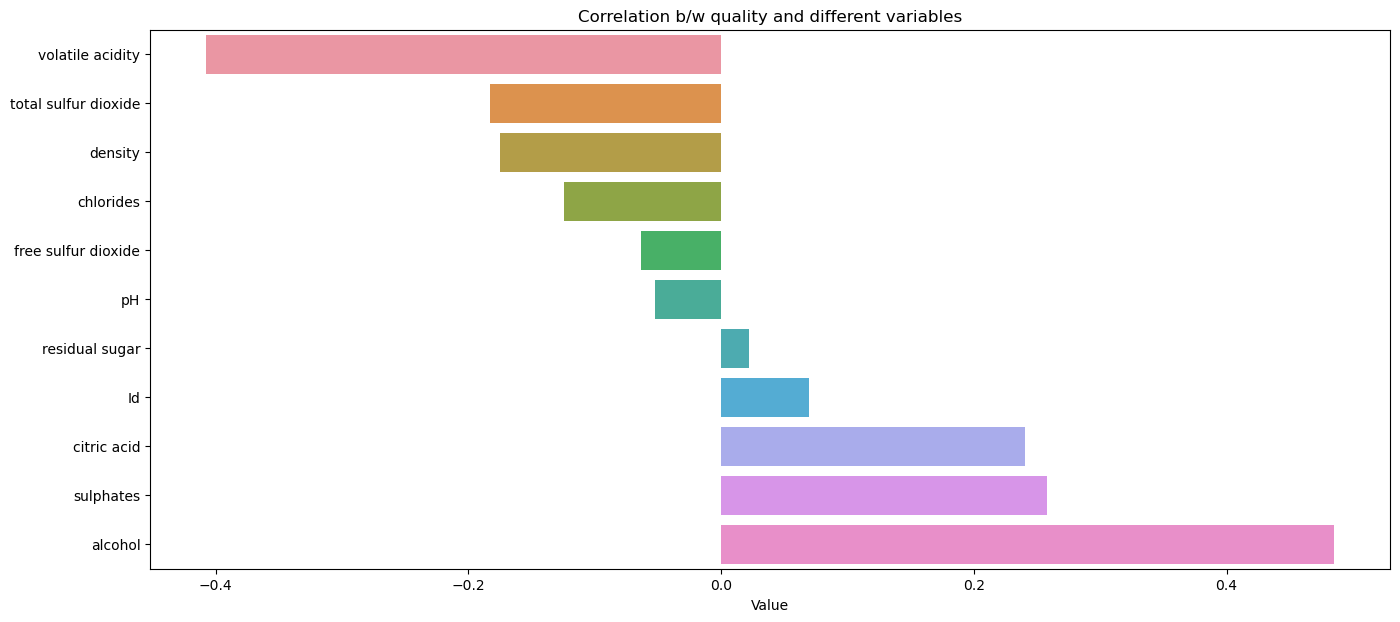

In [15]:
d_corr=data.corr()['quality'][1:].drop('quality',axis=0)

plt.figure(figsize=(16,7))
plt.title('Correlation b/w quality and different variables')
sns.barplot(y=d_corr.sort_values().index,x=d_corr.sort_values().values)
plt.xlabel('Value')

Outliers

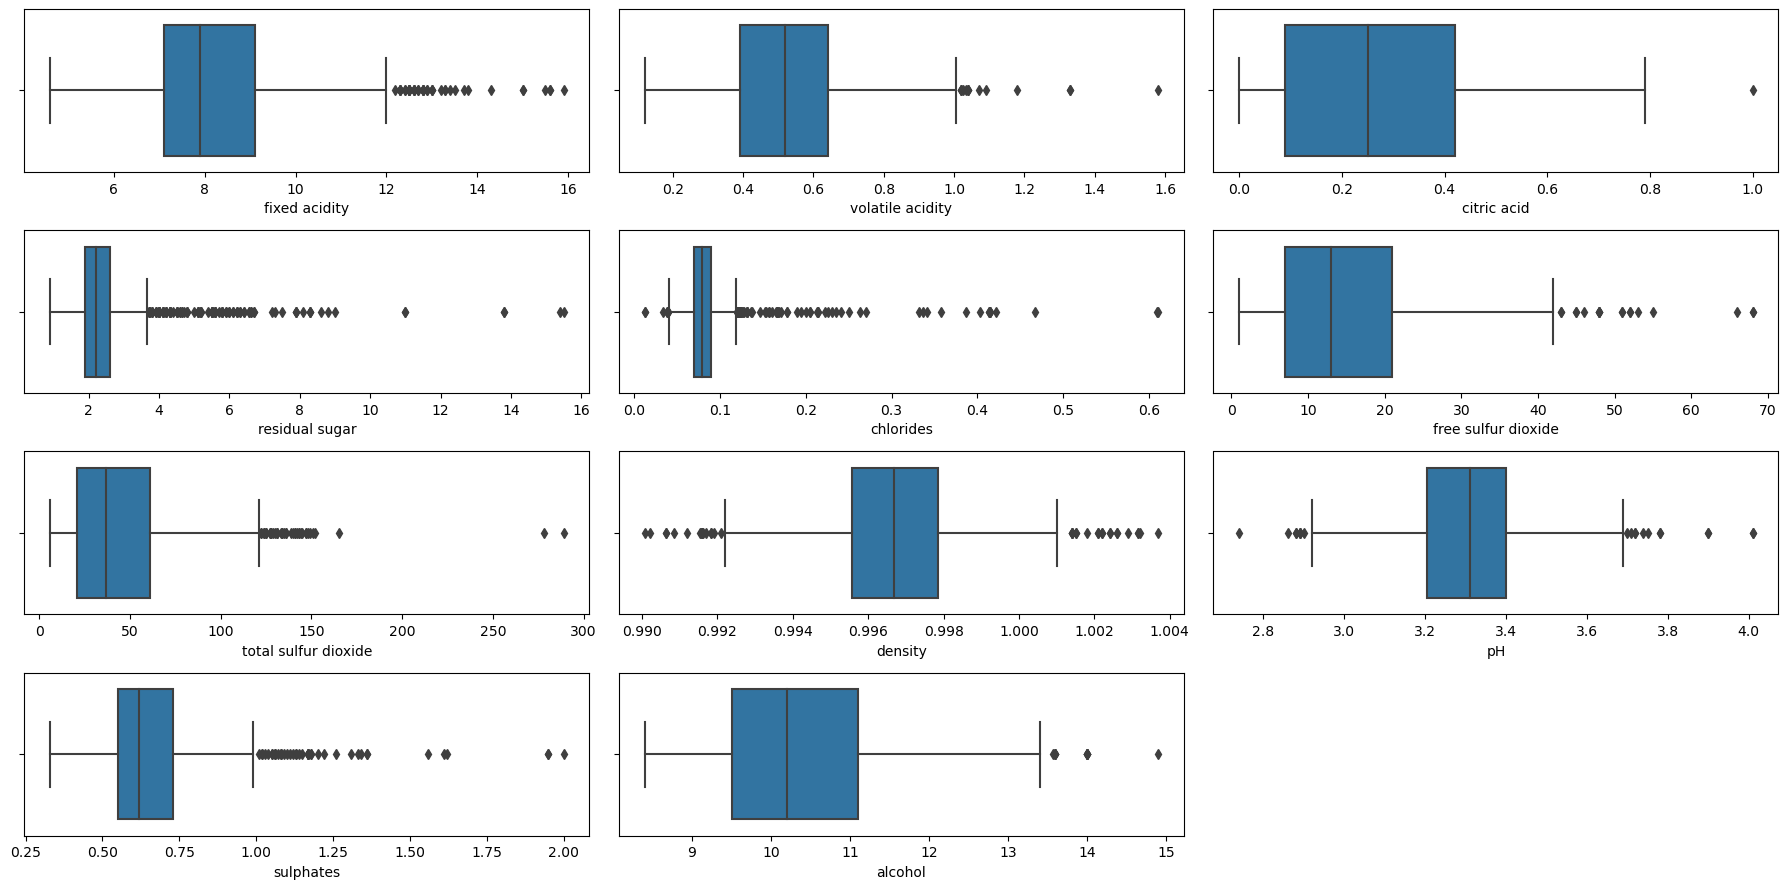

In [16]:
plt.figure(figsize=(18,9))
o_count=1
for i in cols_to_draw:
    plt.subplot(4,3,o_count)
    sns.boxplot(data[i])
    o_count=o_count+1
plt.tight_layout() 

In [17]:
df=data.copy()
df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

Data Pre-Processing

In [18]:
df['quality']=df['quality'].map({3:'Bad',4:'Bad',5:'Bad',6:'Good',7:'Good',8:'Good'})
df['quality'].value_counts()

Good    621
Bad     522
Name: quality, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['quality']=le.fit_transform(df['quality'])
df['quality'].value_counts()

1    621
0    522
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

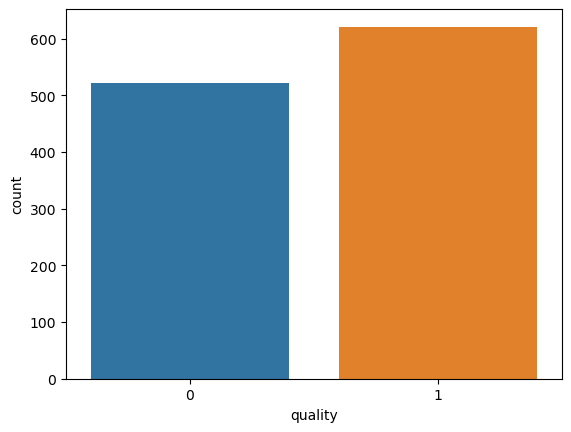

In [20]:
sns.countplot(df.quality)

In [21]:
x=df.drop(['quality','Id'],axis=1)
y=df.quality

In [22]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [23]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1138    1
1139    1
1140    0
1141    1
1142    0
Name: quality, Length: 1143, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(857, 11)
(857,)
(286, 11)
(286,)


In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

Modelling

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

model=LogisticRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print('Training Accuracy:',model.score(x_train,y_train))
print('Testing Accuracy:',model.score(x_test,y_test))

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Training Accuracy: 0.7549591598599766
Testing Accuracy: 0.7517482517482518
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       130
           1       0.78      0.76      0.77       156

    accuracy                           0.75       286
   macro avg       0.75      0.75      0.75       286
weighted avg       0.75      0.75      0.75       286

[[ 96  34]
 [ 37 119]]


Support Vector Machine

In [28]:
from sklearn.svm import SVC
model=SVC()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print('Training Accuracy:',model.score(x_train,y_train))
print('Testing Accuracy:',model.score(x_test,y_test))

Training Accuracy: 0.8063010501750292
Testing Accuracy: 0.7832167832167832


In [29]:
param={
    'C':[0.8,0.9,1,1.1,1.2,1.3,1.5],
    'kernel':['linear','rbf'],
    'gamma':[0.1,0.5,0.8,0.9,1.1,1.2,1.4,1.5]
}
grid_svc=GridSearchCV(model,param_grid=param,scoring='accuracy',cv=8)

In [30]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=SVC(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.5],
                         'gamma': [0.1, 0.5, 0.8, 0.9, 1.1, 1.2, 1.4, 1.5],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [31]:
grid_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [32]:
model2=SVC(C=1,gamma=0.1,kernel='rbf')
model2.fit(x_train,y_train)
print('Training Accuracy:',model2.score(x_train,y_train))
print('Testing Accuracy:',model2.score(x_test,y_test))
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

Training Accuracy: 0.808634772462077
Testing Accuracy: 0.7832167832167832
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       130
           1       0.81      0.78      0.80       156

    accuracy                           0.78       286
   macro avg       0.78      0.78      0.78       286
weighted avg       0.78      0.78      0.78       286



Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=200)
model.fit(x_train,y_train)
print('Training Accuracy:',model.score(x_train,y_train))
print('Testing Accuracy:',model.score(x_test,y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.7937062937062938


In [34]:
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       130
           1       0.83      0.78      0.80       156

    accuracy                           0.79       286
   macro avg       0.79      0.80      0.79       286
weighted avg       0.80      0.79      0.79       286



In [35]:
model_eval=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
model_eval.mean()

0.7853625170998632

Decison Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

model.fit(x_train,y_train)

print('Training Accuracy:',model.score(x_train,y_train))
print('Testing Accuracy:',model.score(x_test,y_test))


Training Accuracy: 1.0
Testing Accuracy: 0.6538461538461539


In [37]:
y_pred=model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.61      0.63       135
           1       0.67      0.69      0.68       151

    accuracy                           0.65       286
   macro avg       0.65      0.65      0.65       286
weighted avg       0.65      0.65      0.65       286



In [38]:
model_eval=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
model_eval.mean()

0.7153625170998632